In [38]:
!pip install pandas
#official Neo4j driver for Python
!pip install neo4j
!pip install matplotlib
!pip install sklearn
!pip install seaborn

     |████████████████████████████████| 285 kB 193 kB/s eta 0:00:01


In [2]:
#Data Pipeline : Extract
import pandas as pd

df_issues = pd.read_csv('updated_issues.csv')
print(f'# Gitlab Issues Dataset')
print(df_issues.shape)
print(df_issues.columns)
print(f'# Microsoft 365 Dataset')
df_emails = pd.read_csv('updated_email.csv')
print(df_emails.shape)
print(df_emails.columns)

# Gitlab Issues Dataset
(6389, 8)
Index(['Unnamed: 0', 'Issue Id', 'Assignee_email', 'Reporter_email',
       'Creation Date', 'Close Date', 'Estimated Time', 'Actual Time'],
      dtype='object')
# Microsoft 365 Dataset
(12830, 6)
Index(['Unnamed: 0', 'date_time_utc', 'event_id', 'recipient_address',
       'recipient_status', 'sender_address'],
      dtype='object')


In [3]:
print(f'# Gitlab Issues Dataset')
#remove index , use default pandas index
df_issues = df_issues.drop('Unnamed: 0', axis = 1, errors='ignore')
print("############ Duplicate Rows  ##############")
print(df_issues.duplicated().sum())
print("############ Missing Data #################")
print(df_issues.isnull().sum())
df_issues = df_issues.dropna(subset=['Assignee_email']).reset_index()
df_issues['Close Date'] = df_issues['Close Date'].fillna('open')
aggregateData = df_issues.groupby(['Assignee_email']).agg({'Issue Id': 'count'})
df_employees = pd.DataFrame({'total_tasks': aggregateData['Issue Id']}).reset_index()
df_issues.to_csv('issues.csv')

# Gitlab Issues Dataset
############ Duplicate Rows  ##############
0
############ Missing Data #################
Issue Id             0
Assignee_email    1027
Reporter_email       0
Creation Date        0
Close Date         749
Estimated Time       0
Actual Time          0
dtype: int64


In [ ]:
#plot-employees progress
import matplotlib.pyplot as plt

df_issues['Creation Date'] = pd.to_datetime(df_issues['Creation Date'], infer_datetime_format=True)
df_issues = df_issues[df_issues['Assignee_email'] != 'ext_335']

df_issues['year_month'] = df_issues['Creation Date'].dt.to_period('M')
df_m1 = df_issues[df_issues.year_month == '2021-01']
df_m2 = df_issues[df_issues.year_month == '2021-02']
df_m3 = df_issues[df_issues.year_month == '2021-03']

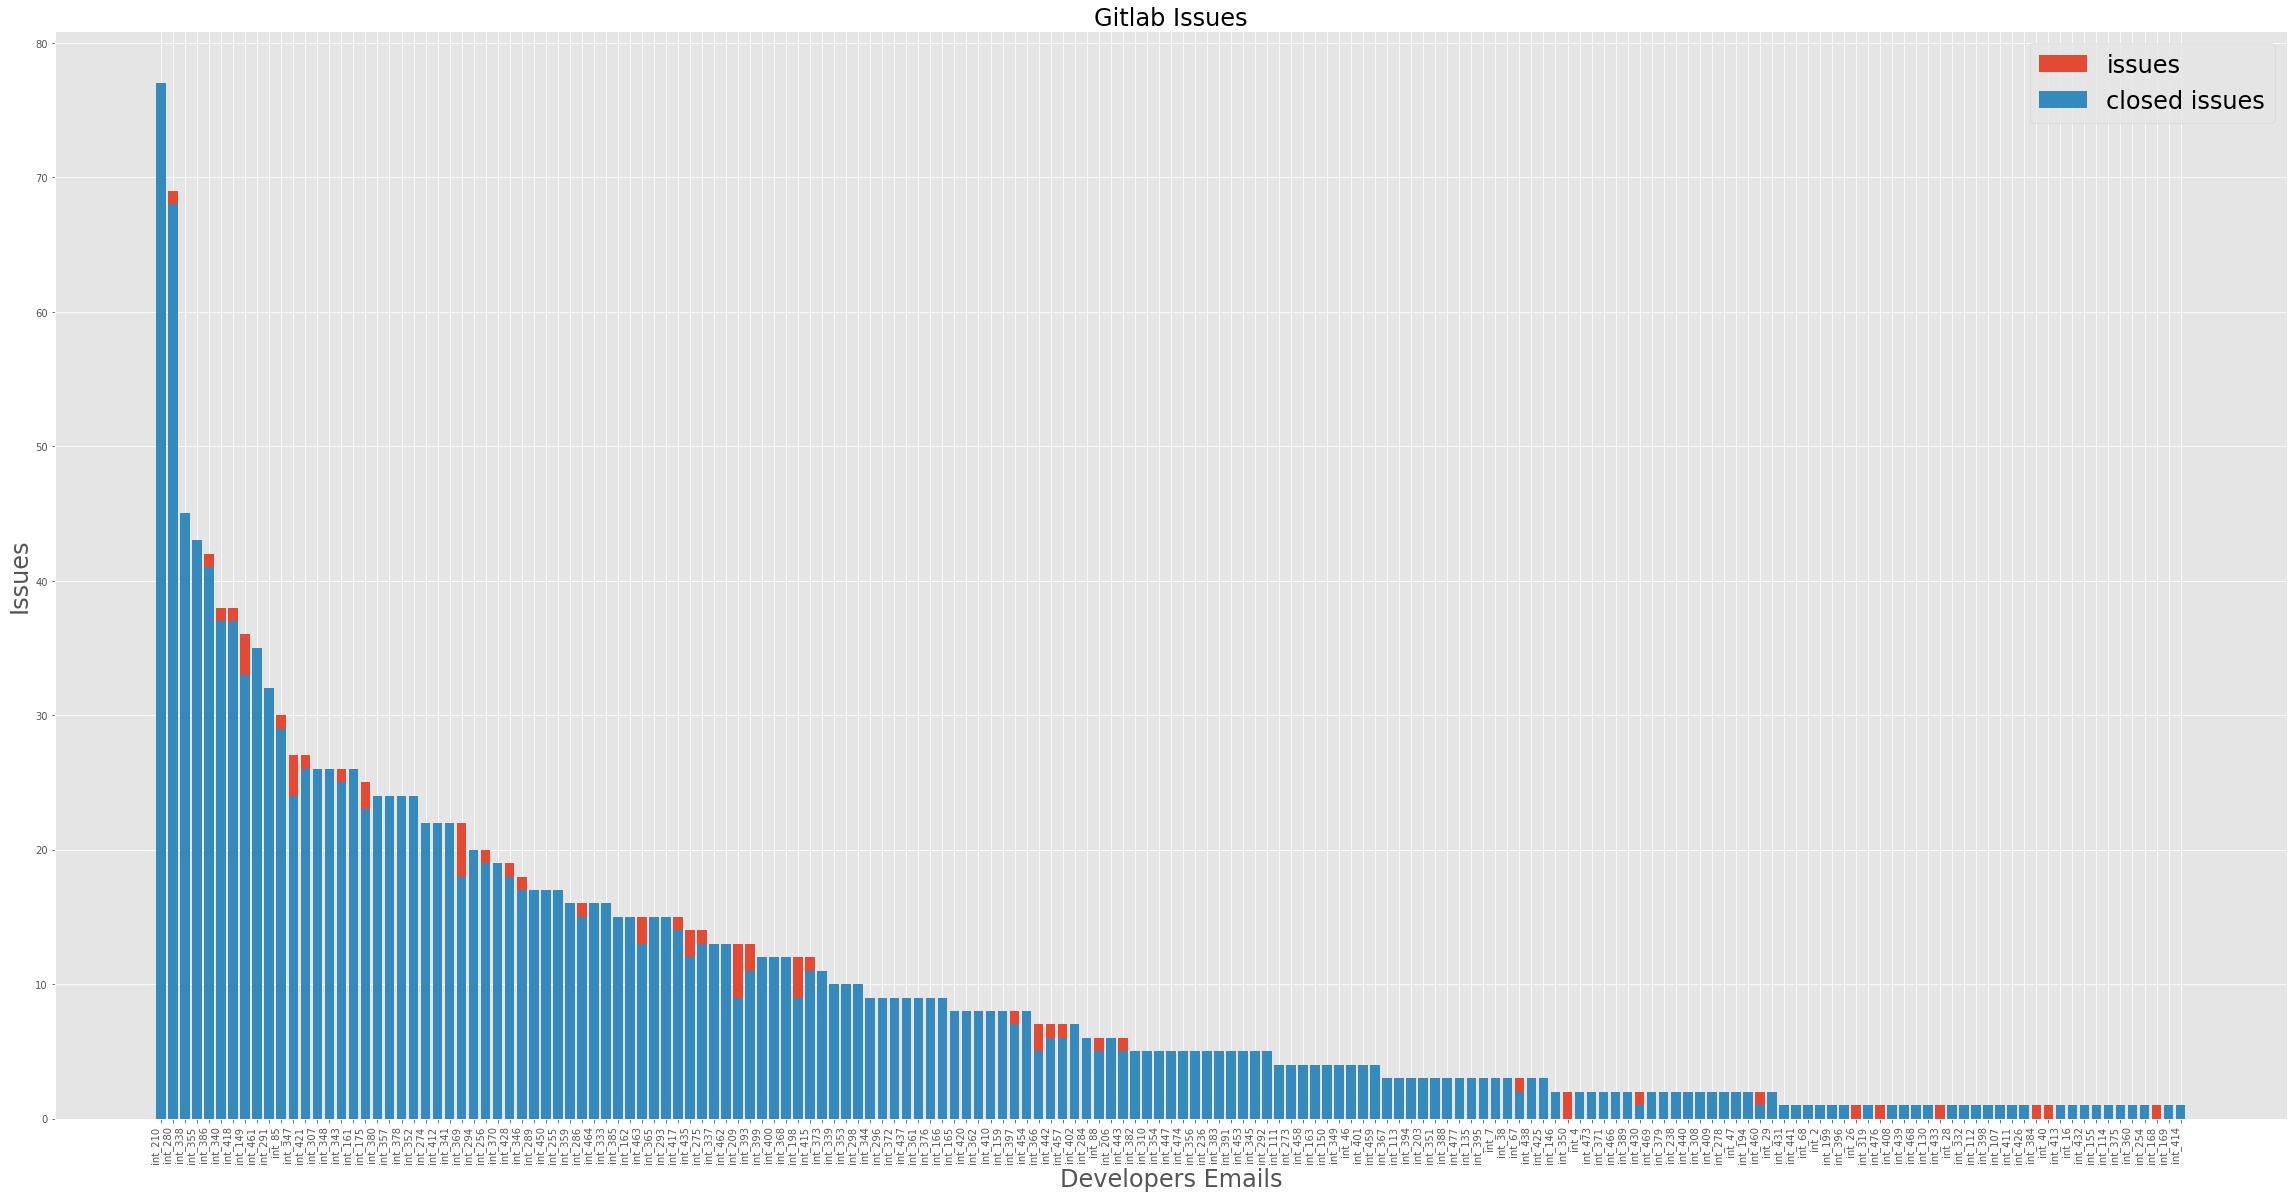

In [27]:
closed_tasks_emails = df_m1[~df_m1['Close Date'].isin(['open'])]['Assignee_email'].value_counts()
issues_by_email = df_m1['Assignee_email'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(40,20))
plt.title("Gitlab Issues", fontsize='24')
index = issues_by_email.keys()
plt.bar(index, issues_by_email ,label = "issues")
index2 = closed_tasks_emails.keys()
plt.bar(index2, closed_tasks_emails, label="closed issues")
plt.xlabel("Developers Emails",fontsize='24')
plt.ylabel("Issues", fontsize='24')
plt.setp(plt.xticks()[1], rotation=90, ha='right') 
plt.legend(prop={'size':24})
plt.show()

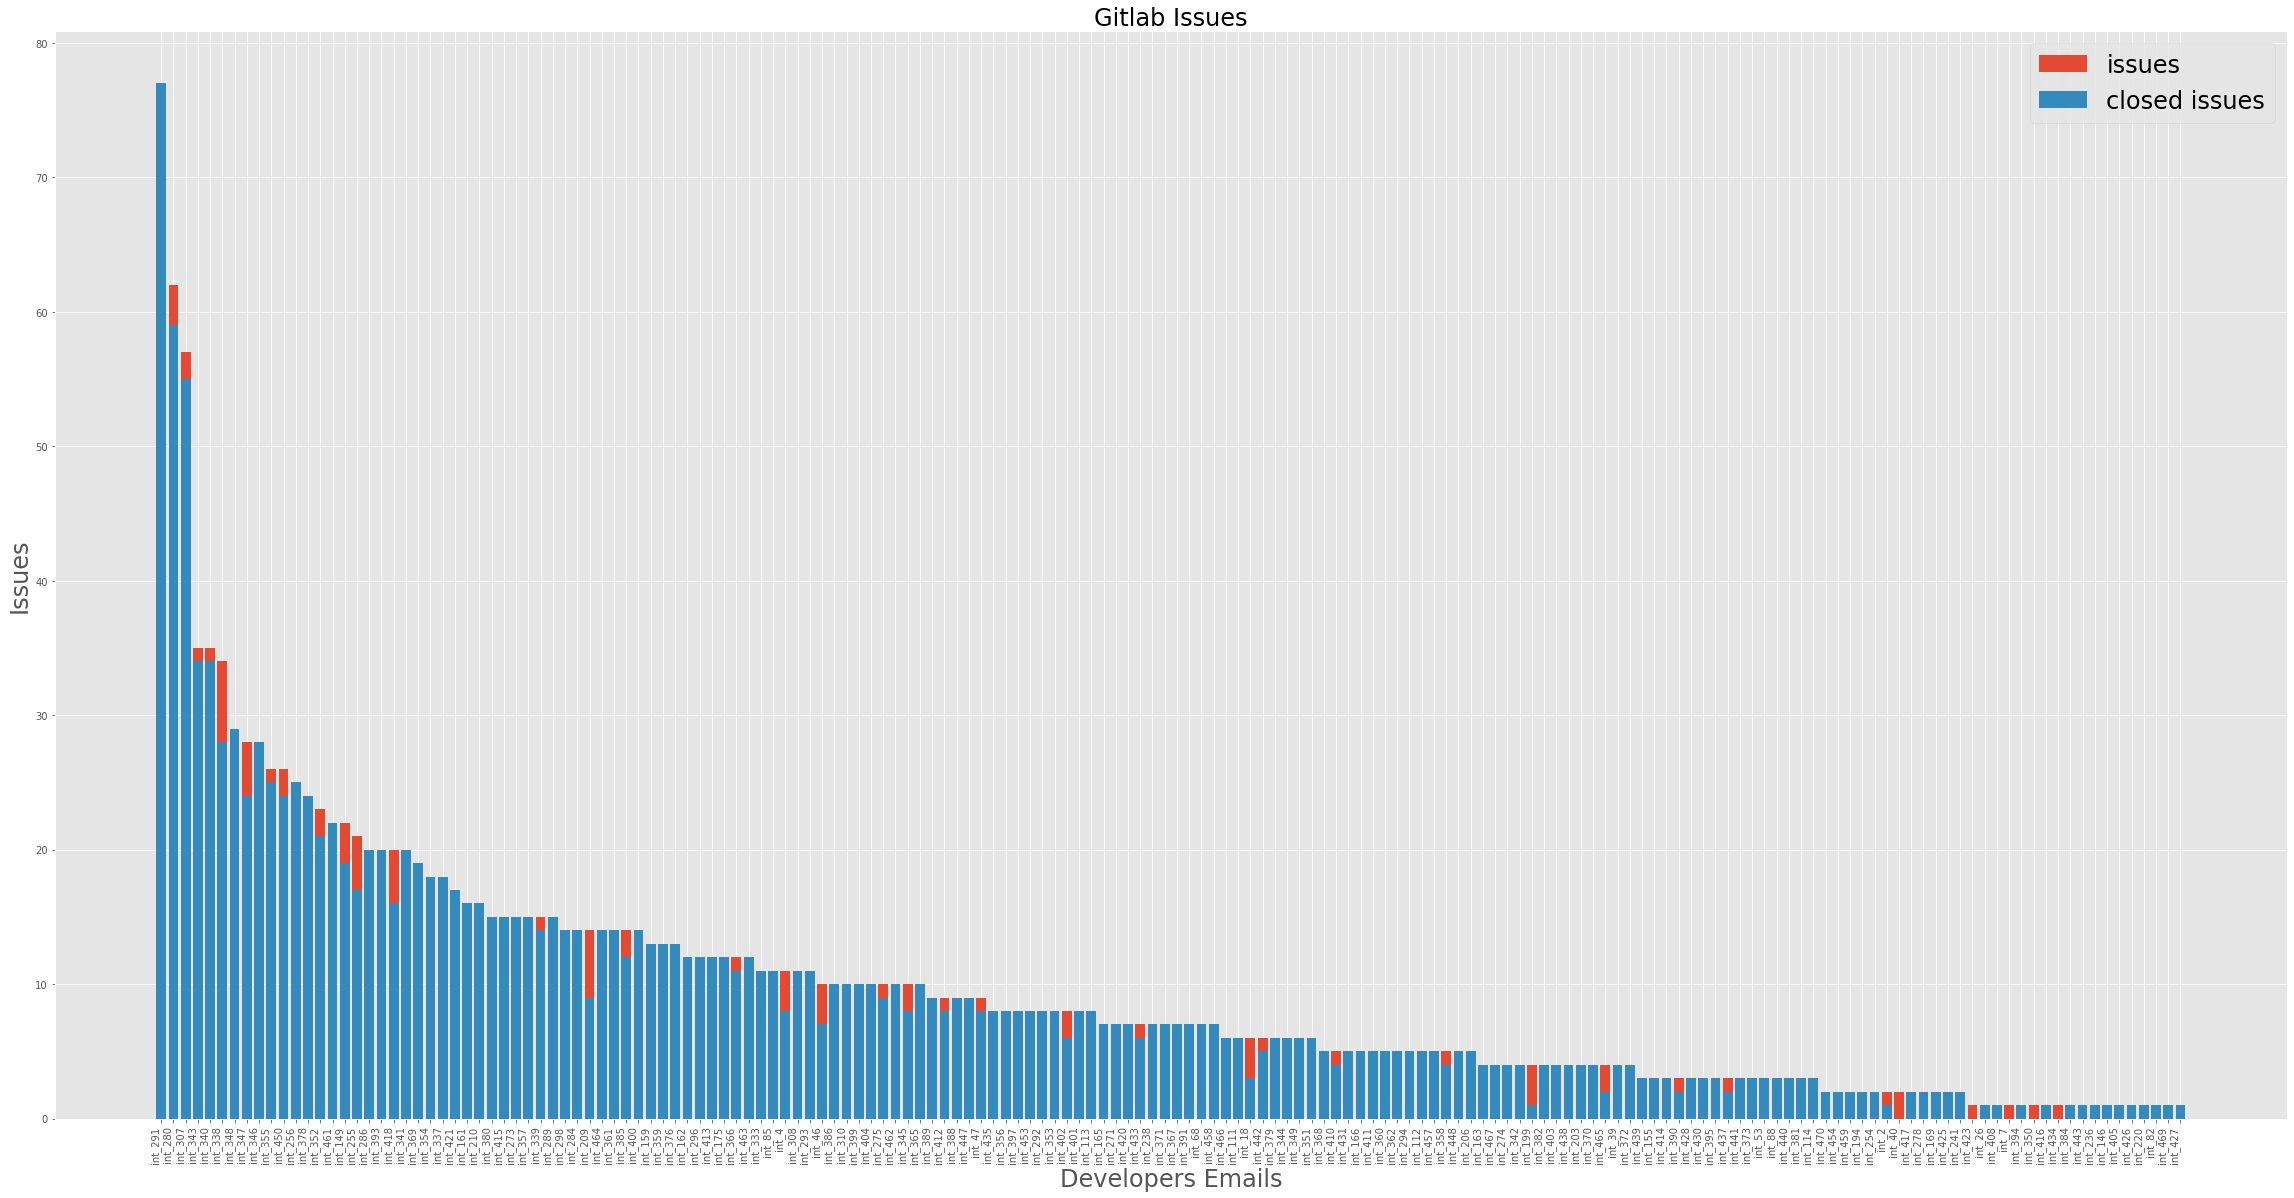

In [29]:
closed_tasks_emails = df_m2[~df_m2['Close Date'].isin(['open'])]['Assignee_email'].value_counts()
issues_by_email = df_m2['Assignee_email'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(40,20))
plt.title("Gitlab Issues", fontsize='24')
index = issues_by_email.keys()
plt.bar(index, issues_by_email ,label = "issues")
index2 = closed_tasks_emails.keys()
plt.bar(index2, closed_tasks_emails, label="closed issues")
plt.xlabel("Developers Emails",fontsize='24')
plt.ylabel("Issues", fontsize='24')
plt.setp(plt.xticks()[1], rotation=90, ha='right') 
plt.legend(prop={'size':24})
plt.show()

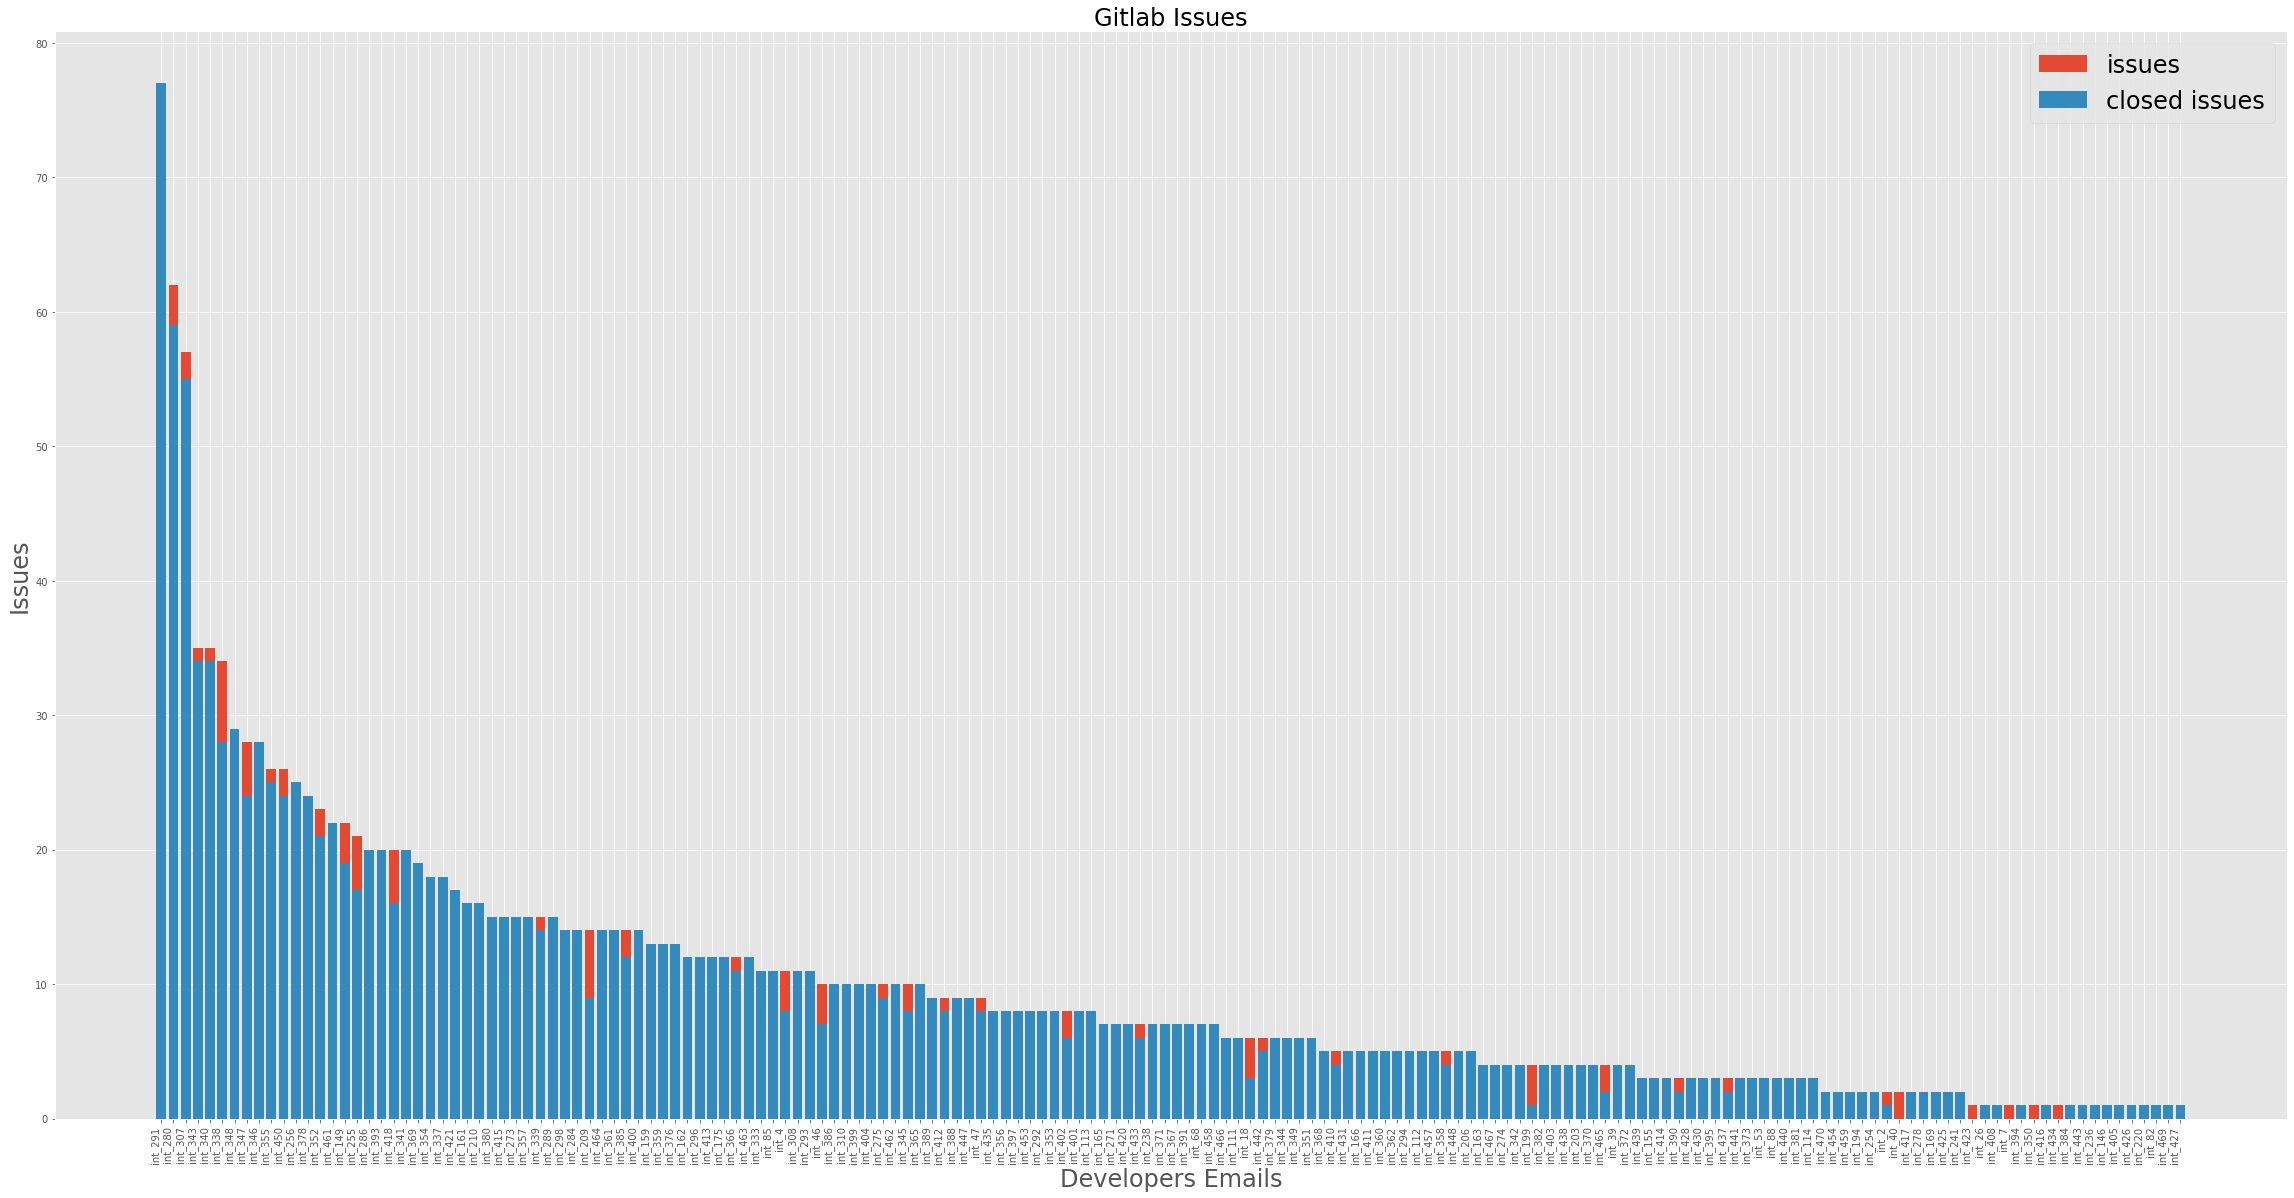

In [28]:
closed_tasks_emails = df_m2[~df_m2['Close Date'].isin(['open'])]['Assignee_email'].value_counts()
issues_by_email = df_m2['Assignee_email'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(40,20))
plt.title("Gitlab Issues", fontsize='24')
index = issues_by_email.keys()
plt.bar(index, issues_by_email ,label = "issues")
index2 = closed_tasks_emails.keys()
plt.bar(index2, closed_tasks_emails, label="closed issues")
plt.xlabel("Developers Emails",fontsize='24')
plt.ylabel("Issues", fontsize='24')
plt.setp(plt.xticks()[1], rotation=90, ha='right') 
plt.legend(prop={'size':24})
plt.show()

In [8]:
#Data Pipeline : Extract

print(f'# Microsoft 365 Emails Dataset')
df_emails = df_emails.drop('Unnamed: 0', axis = 1, errors='ignore')
print("############ Duplicate Rows  ##############")
print(df_emails.duplicated().sum())
print("############ Missing Data ################")
print(df_emails.isnull().sum())

#Data Pipeline : Transform

#Remove duplicate rows except first occurrence based on all columns.
df_emails = df_emails.drop_duplicates(subset=None, keep='first')
#split recipient_address,recipient_status
df_emails['recipient_address'] = df_emails['recipient_address'].str.rstrip(';')
df_emails = df_emails.assign(recipient_address=df_emails['recipient_address'].str.split(';')).explode('recipient_address').reset_index(drop=True)

#Remove support email int_1
df_emails = df_emails[(df_emails.recipient_address != 'int_1')]
df_emails= df_emails[(df_emails.sender_address != 'int_1')]

print("############ Duplicate Rows in Emails Dataset After explode process ##############")
print(df_emails.duplicated().sum())
#Remove duplicate rows except first occurrence based on all columns.
df_emails = df_emails.drop_duplicates(subset=None, keep='first')

#Aggregate data
aggregateData = df_emails.groupby(['sender_address']).agg({'recipient_address': lambda x: list(x)})
df_emails = pd.DataFrame({'recipients_addresses': aggregateData['recipient_address']}).reset_index()
df_emails['recipients_addresses_count'] = df_emails['recipients_addresses'].apply(lambda x: len(x))
df_employees = df_employees.merge(df_emails, left_on = "Assignee_email", right_on = "sender_address", how = "left")
df_employees.to_csv("employees.csv")

# Microsoft 365 Emails Dataset
############ Duplicate Rows  ##############
237
############ Missing Data ################
date_time_utc           0
event_id                0
recipient_address       0
recipient_status     8268
sender_address          0
dtype: int64
############ Duplicate Rows in Emails Dataset After explode process ##############
3282


176
0
176
176
---
0
cluster value counts
0    163
1     29
2     15
Name: cluster, dtype: int64


<ipython-input-42-f3fed2d29c0a>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  empdata['#recipients_addresses'][mask] = '0'


<AxesSubplot:xlabel='total_tasks', ylabel='#recipients_addresses'>

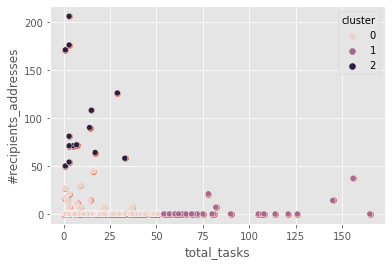

In [42]:
#cluster
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import numpy as np
import seaborn as sns

empdata = pd.read_csv('employees.csv')


print((empdata['recipients_addresses'].isna()).sum())

empdata['recipients_addresses'] = empdata['recipients_addresses'].fillna('0')

print((empdata['recipients_addresses'].isna()).sum())


empdata['#recipients_addresses'] = empdata['recipients_addresses'].apply(lambda n: len(n.split(',')))

#print(empdata.info())


print((empdata['recipients_addresses'].values == '0').sum())

mask = empdata['recipients_addresses'] == '0'
empdata['#recipients_addresses'][mask] = '0'

empdata['recipients_addresses'].replace(['0'], np.nan, inplace=True)

print((empdata['recipients_addresses'].isna()).sum())

print('---')
print((empdata['recipients_addresses'].values == '0').sum())

empdata = empdata.astype({"#recipients_addresses": int})
empdata.to_csv('employeesWithEmailsCountLatest.csv')


plt.scatter(empdata['total_tasks'], empdata['#recipients_addresses'])


#empdata = empdata.dropna()
#empdata.to_csv('/content/drive/My Drive/dataToRead/employeesWithEmailsCountDrppedFitlered.csv')
#plt.scatter(empdata['total_tasks'], empdata['#recipients_addresses'])


kmeans = cluster.KMeans(n_clusters=3)
kmeans = kmeans.fit(empdata[['total_tasks', '#recipients_addresses']])

kmeans.cluster_centers_

empdata['cluster'] = kmeans.labels_

#print('see cluster column')
#print(empdata.head())
print('cluster value counts')
print(empdata['cluster'].value_counts())

sns.scatterplot(x="total_tasks", y="#recipients_addresses", hue="cluster", data=empdata)

In [10]:
#Data Pipeline : load 
from neo4j import GraphDatabase

class Neo4jConnection:

    def __init__(self, uri, user, password):
        self.driver = GraphDatabase.driver(uri, auth=(user, password))

    def close(self):
        self.driver.close()

    def query(self, query, parameters=None, db=None):
        assert self.driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.driver.session(database=db) if db is not None else self.driver.session() 
            response = list(session.run(query, parameters))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response


if __name__ == "__main__":
    
    NEO4J_HOST = "neo4j"
    NEO4J_PORT = 7687
    NEO4J_USERNAME = "neo4j"
    NEO4J_PASSWORD = "test"

    NEO4J_URI = "neo4j://{NEO4J_HOST}:{NEO4J_PORT}".format(NEO4J_HOST=NEO4J_HOST,NEO4J_PORT=NEO4J_PORT)
    conn = Neo4jConnection(NEO4J_URI, NEO4J_USERNAME, NEO4J_PASSWORD)

In [30]:
conn.query('CREATE CONSTRAINT employeesConstraint IF NOT EXISTS ON (E:Employee) ASSERT E.Assignee_email IS UNIQUE')

#employee node
conn.query("""LOAD CSV WITH HEADERS FROM "file:///employees.csv" AS row 
           CREATE (E:Employee) 
           SET E.Assignee_email = row.Assignee_email 
           SET E.total_tasks = row.total_tasks
           SET E.recipients_addresses = coalesce(split(replace(replace(replace(replace(row.recipients_addresses,"[",""),"]",""),"'","")," ",""),","), [])
           SET E.recipients_addresses_count = coalesce(toInteger(row.recipients_addresses_count), 0)
           RETURN count(*) as total """)

[<Record total=207>]

In [31]:
conn.query('CREATE CONSTRAINT taskConstraint IF NOT EXISTS ON (T:Task) ASSERT T.`Issue Id` IS UNIQUE')

#task node
conn.query('LOAD CSV WITH HEADERS FROM "file:///issues.csv" AS row \
           CREATE (T:Task) \
           SET T.Issue_Id = row.`Issue Id` \
           SET T.Assignee_email = row.Assignee_email \
           SET T.Reporter_email = row.Reporter_email \
           SET T.Creation_Date = row.`Creation Date` \
           SET T.Close_Date  = row.`Close Date`  \
           SET T.Estimated_Time = toInteger(row.`Estimated Time`) \
           SET T.Actual_Time = toInteger(row.`Actual Time`) \
           RETURN count(*) as total')

[<Record total=5362>]

In [32]:
#Relationships 
conn.query('MATCH (E:Employee), (T:Task) WHERE E.Assignee_email = T.Reporter_email \
            CREATE (E)-[r: CREATE_TASK ]->(T) \
            RETURN count(r) as total')

[<Record total=4650>]

In [33]:
conn.query('MATCH (T:Task), (E:Employee) WHERE T.Assignee_email = E.Assignee_email \
            CREATE (T)-[r: ASSIGNEE_TO ]->(E) \
            RETURN count(r) as total')

[<Record total=5362>]

In [34]:
conn.query('MATCH (E1:Employee), (E2:Employee) WHERE (E1.Assignee_email IN E2.recipients_addresses) \
            CREATE (E2)-[r: SEND_TO ]->(E1) \
            RETURN count(r) as total')

[<Record total=62>]

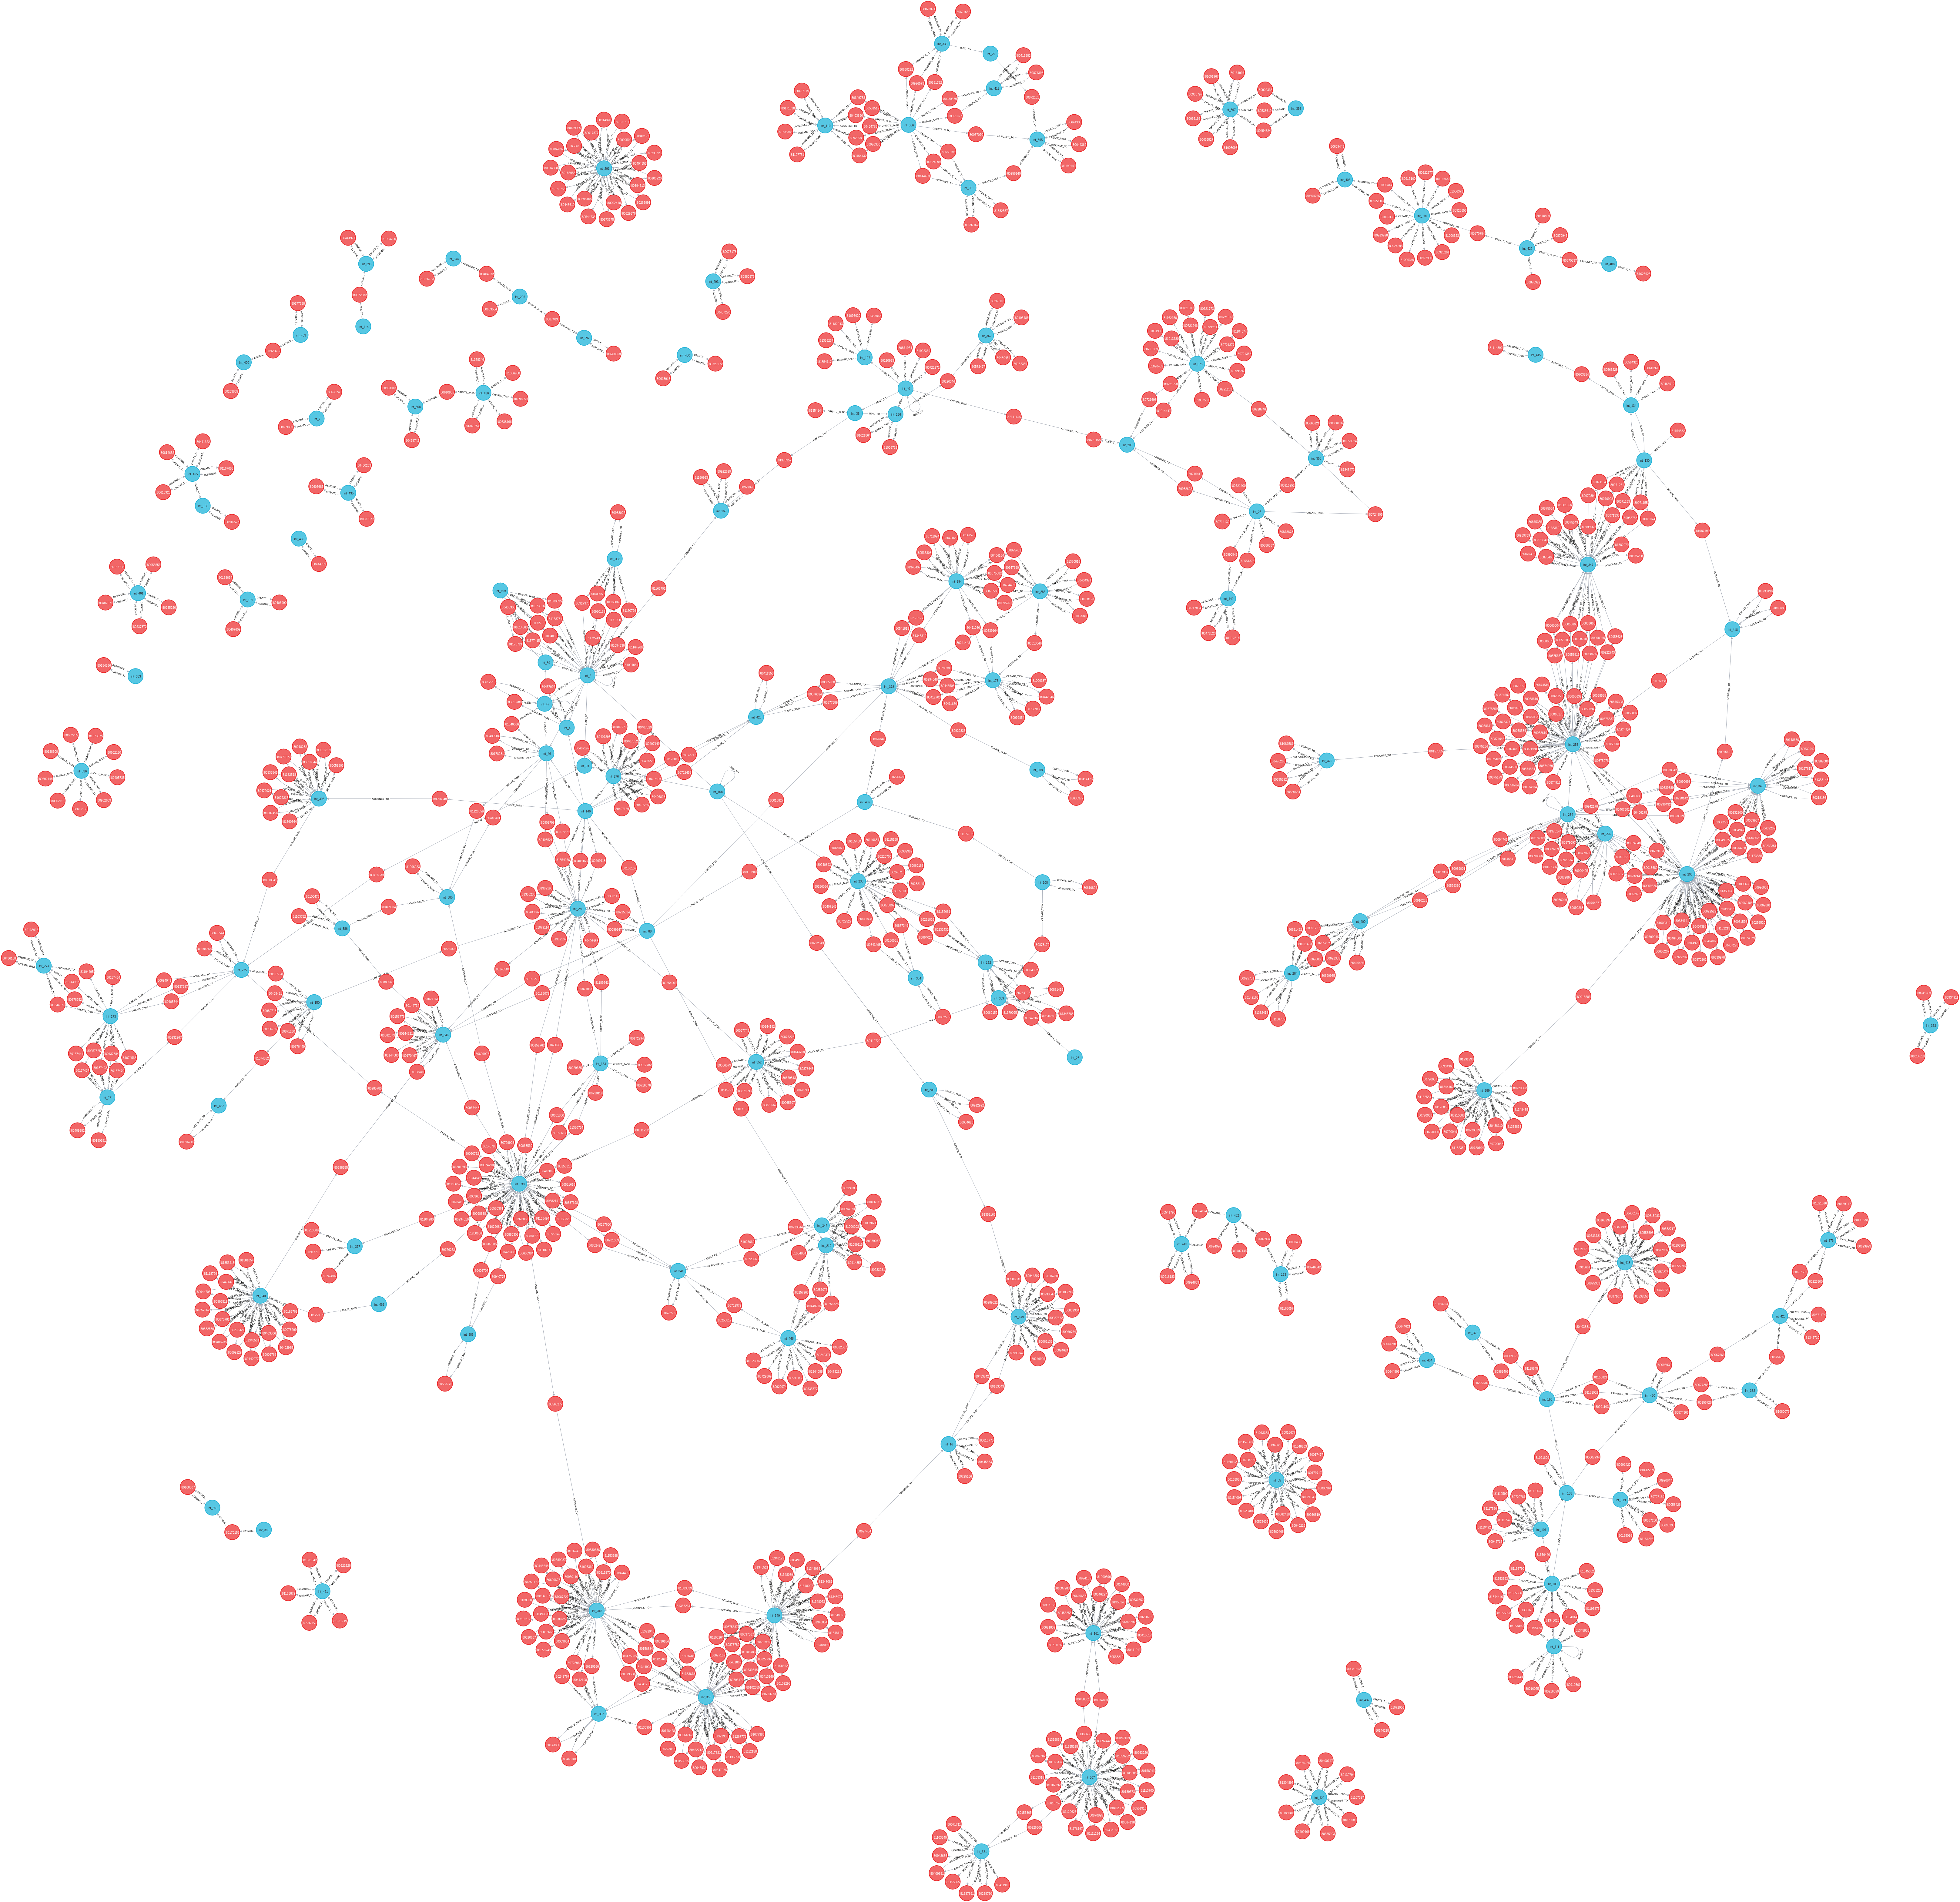

In [16]:
from IPython.display import Image
Image("graph.png")